Task:\
Apply filters to the power spectrum in different regions of l space and generate map for each filter

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import camb
import healpy as hp
from camb import model, initialpower

planck2018pars = camb.read_ini("planck_2018.ini")
planck2018 = camb.get_results(planck2018pars)

In [3]:
powers = planck2018.get_cmb_power_spectra(planck2018pars, CMB_unit="muK", raw_cl=True)
# total power spectrum
Cl_Total = powers["total"]
# temperature spectrum
ClTT = Cl_Total[:, 0]
# l starts from 0 (monopole)
lmax = len(ClTT) - 1
# l steps
l = np.arange(lmax + 1)

In [4]:
# Generating Gaussian normalised in l space
def gaus_l(l, sig, l0):
    # Normalisation
    N = np.sum((2 * l + 1) * np.exp(-0.5 * (l - l0) ** 2 / sig / sig))
    G = np.exp(-0.5 * (l - l0) ** 2 / sig / sig)
    gaus = G / N
    return gaus

In [5]:
big = gaus_l(l, 50, 0) * ClTT
med = gaus_l(l, 100, 180) * ClTT
sml = gaus_l(l, 300, 1300) * ClTT

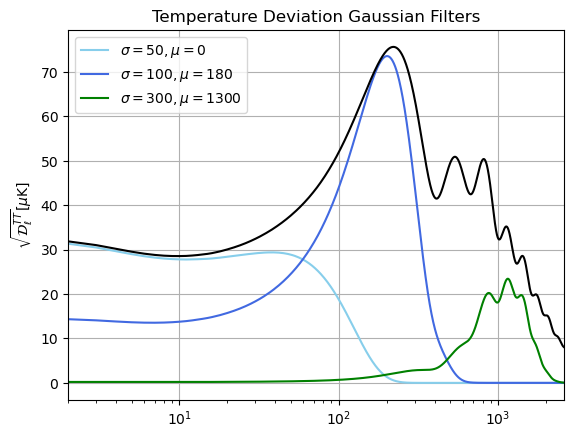

In [6]:
# Filtred Power Spectrum
plt.plot(
    l,
    np.sqrt(big * l * (l + 1) / 2 / np.pi) * 70,
    color="SkyBlue",
    label="$\\sigma=50, \\mu=0$",
)
plt.plot(
    l,
    np.sqrt(med * l * (l + 1) / 2 / np.pi) * 3e2,
    color="RoyalBlue",
    label="$\\sigma=100, \\mu=180$",
)
plt.plot(
    l,
    np.sqrt(sml * l * (l + 1) / 2 / np.pi) * 1e3,
    color="Green",
    label="$\\sigma=300, \\mu=1300$",
)
plt.plot(l, np.sqrt(ClTT * l * (l + 1) / 2 / np.pi), color="Black")
plt.xlim(2, lmax)
plt.legend()
plt.xscale("log")
plt.grid()
plt.ylabel("$\\sqrt{\\mathcal{D}_\\ell^{TT}} [\\mu\\rm K]$")
plt.title("Temperature Deviation Gaussian Filters")
plt.savefig("Output/Gaussian_Filter.png", dpi=300)

In [7]:
# generating healpix map of filtered data
almbig = hp.synalm(big, new=True)
almmed = hp.synalm(med, new=True)
almsml = hp.synalm(sml, new=True)
mapbig = hp.alm2map(almbig, nside=512)
mapmed = hp.alm2map(almmed, nside=512)
mapsml = hp.alm2map(almsml, nside=512)

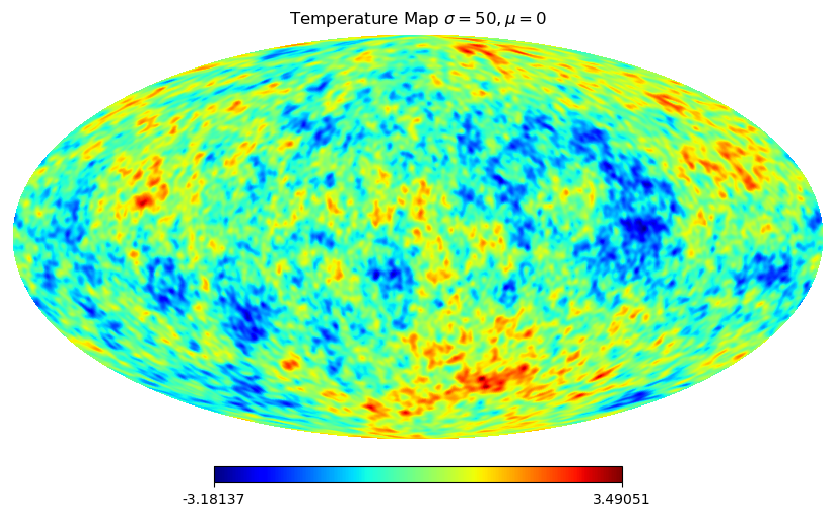

In [8]:
# large scale map
hp.mollview(
    mapbig,
    max=np.max(mapbig),
    min=np.min(mapbig),
    cmap="jet",
    title="Temperature Map $\\sigma=50,\\mu=0$",
)
plt.savefig("Output/Large.png")

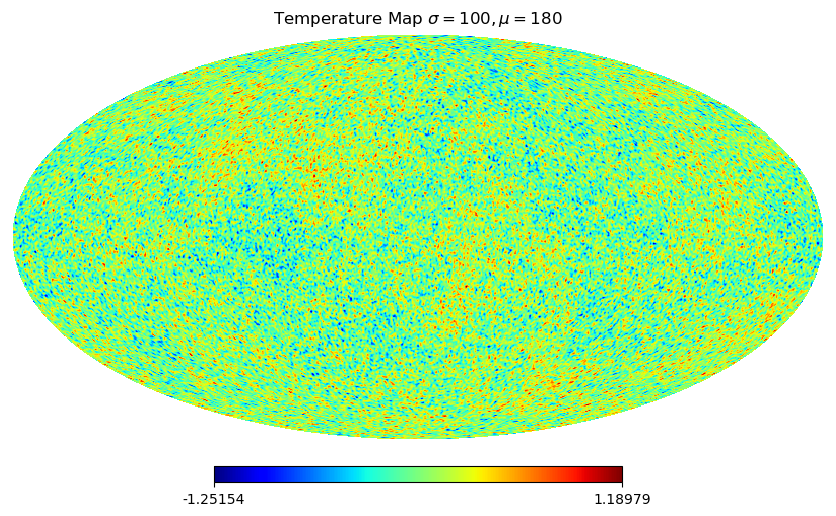

In [9]:
# 1 degree filter map
hp.mollview(
    mapmed,
    max=np.max(mapmed),
    min=np.min(mapmed),
    cmap="jet",
    title="Temperature Map $\\sigma=100,\\mu=180$",
)
plt.savefig("Output/Medium.png")

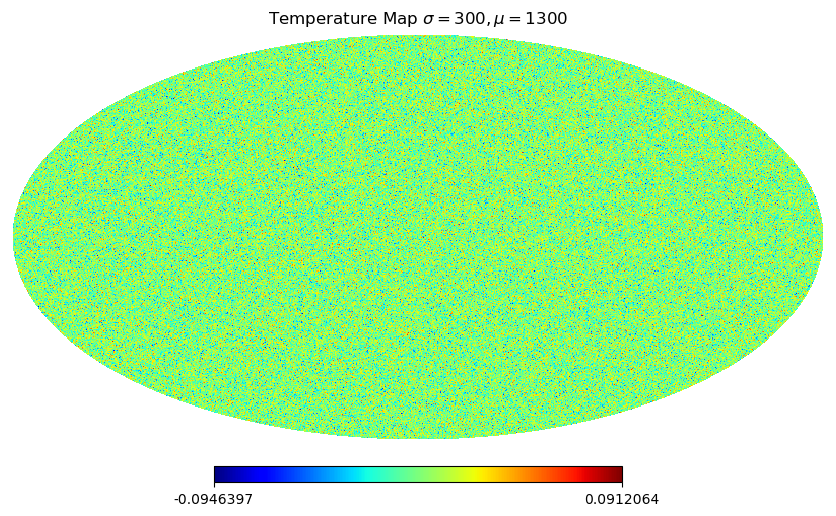

In [10]:
# small scale map
hp.mollview(
    mapsml,
    max=np.max(mapsml),
    min=np.min(mapsml),
    cmap="jet",
    title="Temperature Map $\\sigma=300,\\mu=1300$",
)
plt.savefig("Output/Small.png")